### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('../data/coupons.csv')
data.shape

(12684, 26)

In [3]:
# convert columns to snake case
data.columns = data.columns.str.lower().str.strip().str.replace(" ", "_")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalstatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  bar                   12577 non-null

In [5]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp,y
6002,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,50plus,Divorced,...,never,4~8,1~3,never,1,0,0,1,0,0
2216,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,0,0,0,1,1
9666,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,21,Single,...,never,4~8,1~3,1~3,1,1,0,0,1,1
10381,Work,Alone,Snowy,30,7AM,Carry out & Take away,1d,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,1,0,1,0,0
3942,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Male,26,Married partner,...,1~3,1~3,1~3,1~3,1,0,0,0,1,1
4374,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),2h,Male,21,Unmarried partner,...,1~3,4~8,4~8,never,1,0,0,0,1,0
8496,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,0
12337,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),2h,Male,31,Married partner,...,never,1~3,1~3,1~3,1,1,0,0,1,1
801,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,46,Married partner,...,less1,1~3,less1,never,1,1,0,0,1,0
6009,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,26,Single,...,1~3,gt8,4~8,1~3,1,1,0,0,1,1


## 2. Investigate the dataset for missing or problematic data.

## 2.1 Review the `unique values` in each categorical column

In [6]:
# Loop through each column and print the unique values
for column in data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{column}':\n{data[column].unique()}")


Unique values in 'destination':
['No Urgent Place' 'Home' 'Work']

Unique values in 'passanger':
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Unique values in 'weather':
['Sunny' 'Rainy' 'Snowy']

Unique values in 'time':
['2PM' '10AM' '6PM' '7AM' '10PM']

Unique values in 'coupon':
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Unique values in 'expiration':
['1d' '2h']

Unique values in 'gender':
['Female' 'Male']

Unique values in 'age':
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Unique values in 'maritalstatus':
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Unique values in 'education':
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Unique values in 'occupation':
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' '

## 2.2 Find the `missing values` in all columns

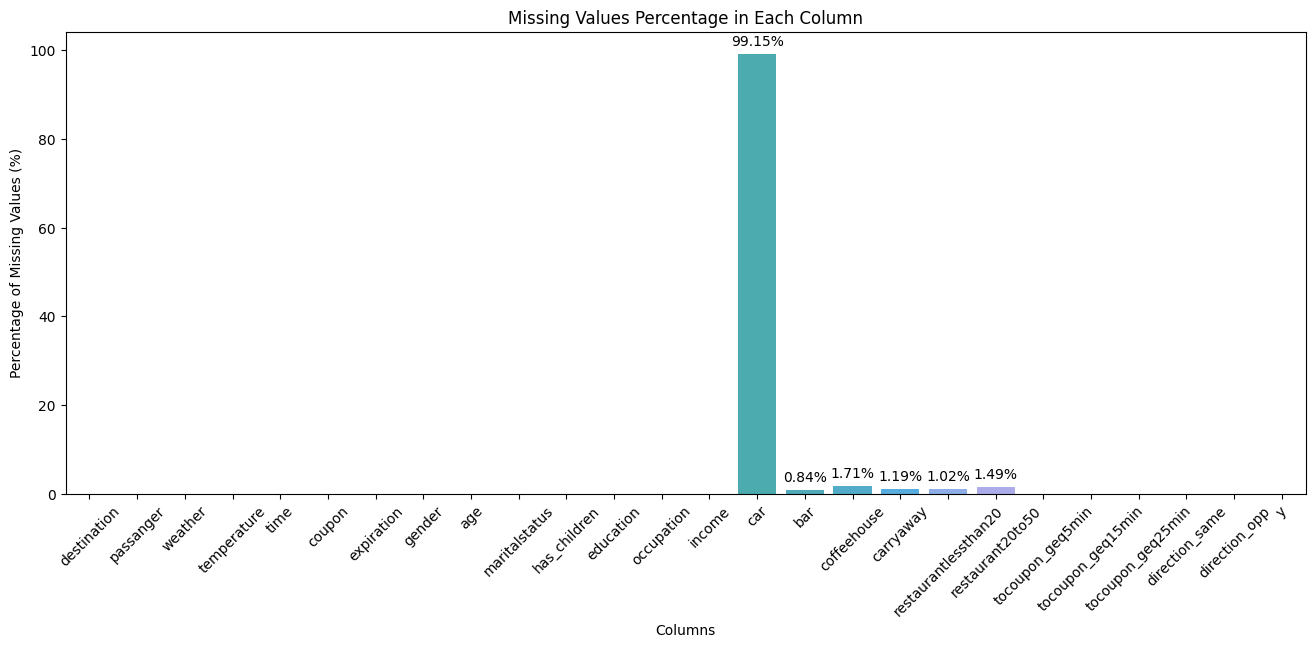

In [7]:
# Calculating missing values in percentage
missing_values_pct = (data.isnull().sum() / len(data)) * 100

# Set figure size (width, height) in inches
plt.figure(figsize=(16, 6))

# Creating a bar plot using seaborn
ax = sns.barplot(x=missing_values_pct.index, y=missing_values_pct.values)

plt.title('Missing Values Percentage in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=45)

# Adding the percentage as a label on each bar, omitting the 0% labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add labels to bars with height greater than 0
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()

## 3. Decide what to do about your missing data -- drop, replace, other...

## 3.1 Replace the missing values in "bar", "coffeehouse", "carryaway", "restaurantlessthan20", "restaurant20to50" with the `most frequented` values

In [8]:
# Replace the missing values in "car" to "Sedan"
data.fillna({'car': 'Sedan'}, inplace=True)

# Replace the missing values in "bar", "coffeehouse", "carryaway", "restaurantlessthan20", "restaurant20to50" with the most frequented values
for column in missing_values_pct.index:
    if missing_values_pct[column] > 0:
        data.fillna({column: data[column].mode()[0]}, inplace=True)

# Show the value counts for the missing columns
for column in missing_values_pct.index:
    if missing_values_pct[column] > 0:
        print(f"\nValue counts in '{column}':\n{data[column].value_counts()}")



Value counts in 'car':
car
Sedan                                       12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

Value counts in 'bar':
bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

Value counts in 'coffeehouse':
coffeehouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

Value counts in 'carryaway':
carryaway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

Value counts in 'restaurantlessthan20':
restaurantlessthan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

Value counts in 'restaurant20to50':
restaurant20to50
less1    6266
1~3      3290
never 

In [9]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalstatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
bar                     0
coffeehouse             0
carryaway               0
restaurantlessthan20    0
restaurant20to50        0
tocoupon_geq5min        0
tocoupon_geq15min       0
tocoupon_geq25min       0
direction_same          0
direction_opp           0
y                       0
dtype: int64

# 4. Feature Correlation

## 4.1 Correlation using `Numerical` Features

/Users/vijay/.pyenv/versions/3.11.8/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


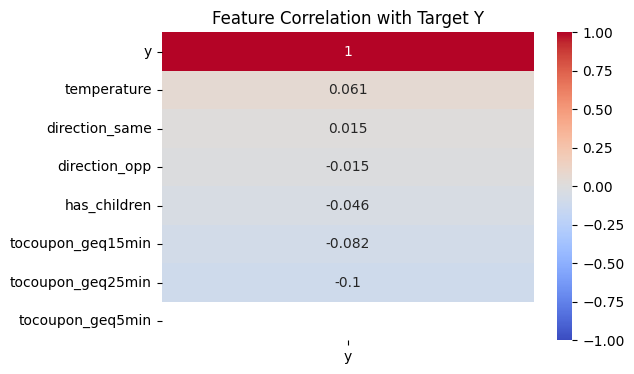

In [10]:
df_numeric = data.select_dtypes(exclude=['object'])

# Calculating the correlation matrix focusing on 'y' and all other numerical features
corr_matrix = df_numeric.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix[['y']].sort_values(by='y', ascending=False), 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1)
plt.title('Feature Correlation with Target Y')

# Show the plot
plt.show()

### **Explanation**
This correlation matrix shows the linear relationship between several features and the binary target variable Y, where Y represents whether a Coupon was accepted (1) or not (0).
+ The most significant (yet still weak) correlations with coupon acceptance are related to travel time, suggesting that convenience is a factor in decision-making.
+ The presence of children also plays a role, although the impact is minor.
+ The direction of the destination relative to the customer's current path has an almost negligible effect on the likelihood of coupon acceptance.
+ Temperature's impact is very subtle, which might suggest that slight variations in weather could influence activities related to the event.


## 4.2 Correlation using `Categorical` Features

/Users/vijay/.pyenv/versions/3.11.8/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


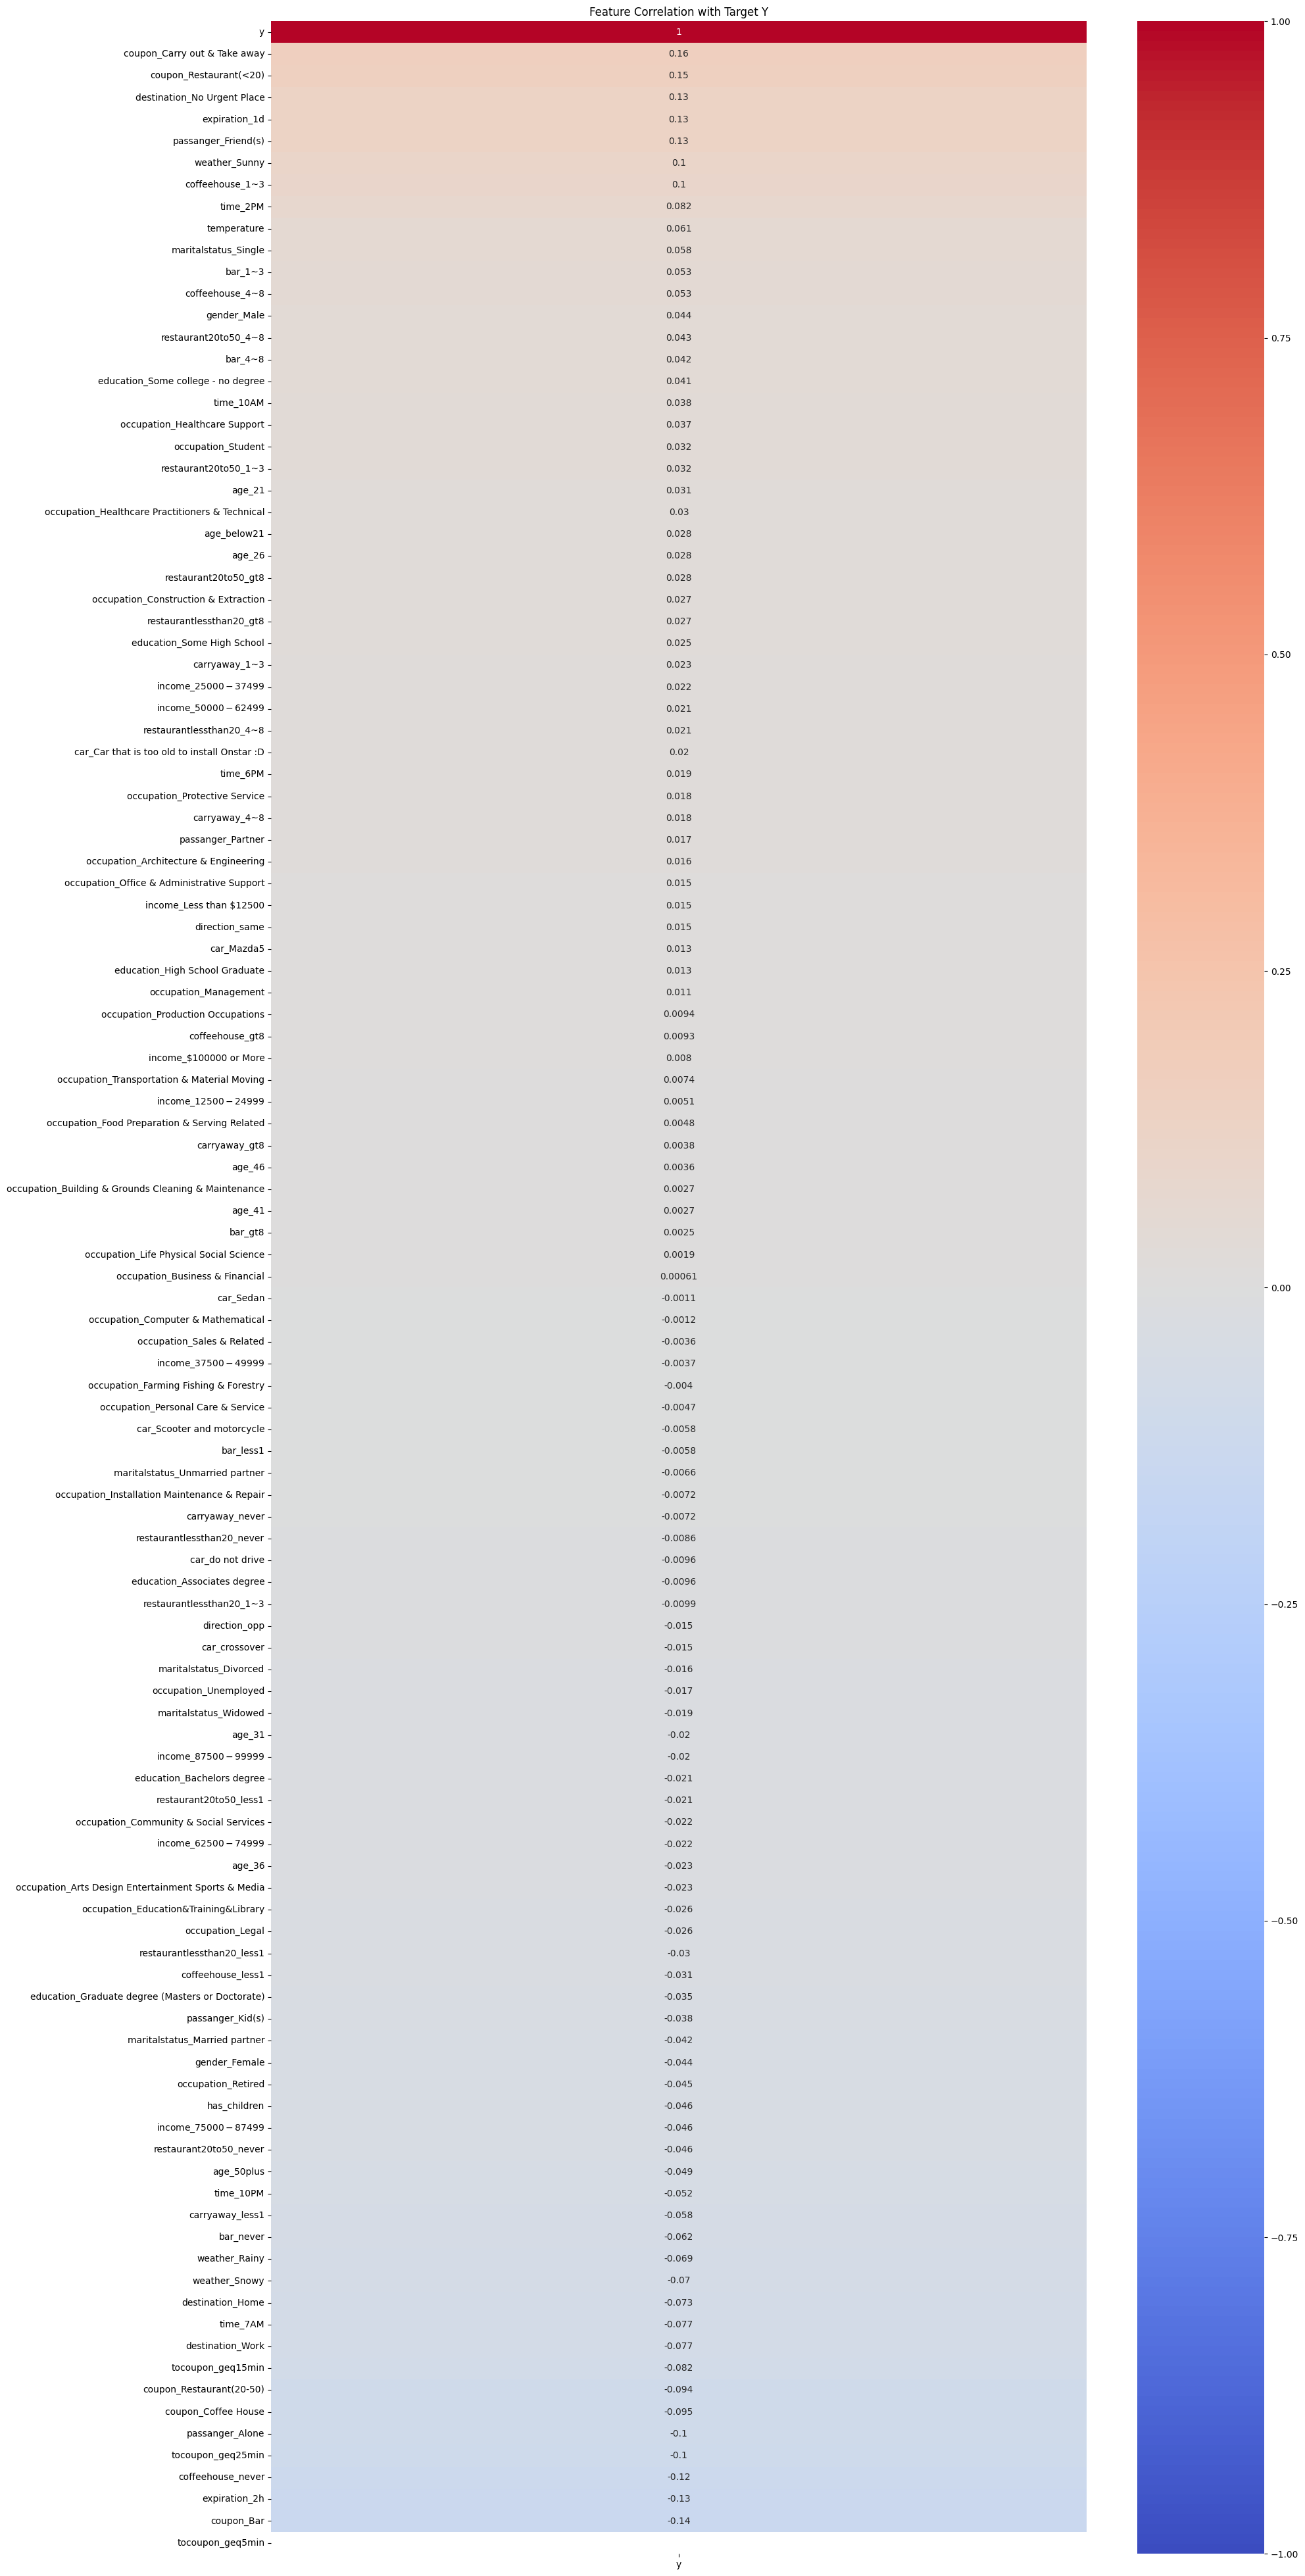

In [11]:
# Selecting object (categorical) columns for one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns

# Applying one-hot encoding
df_encoded = pd.get_dummies(data, columns=categorical_cols)

corr_matrix_encoded = df_encoded.corr()

# Filter correlation matrix to show correlations with 'Y'
corr_with_y = corr_matrix_encoded[['y']].sort_values(by='y', ascending=False)

plt.figure(figsize=(20, 50))
sns.heatmap(corr_with_y, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1)
plt.title('Feature Correlation with Target Y')

# Show the plot
plt.show()

### **Explanation**
Similar to the above correlation matrix, it shows the linear relationship between several features and the binary target variable Y, where Y represents whether a Coupon was accepted (1) or not (0).
+ The strongest predictors for the target event relate to the convenience and social nature of coupon use. Coupons for carryout and less expensive restaurants are more likely to be accepted, especially when there's no urgent destination and the weather is nice.
+ Factors that add inconvenience, such as traveling more than 15 or 25 minutes, or having opposite travel directions, decrease the likelihood of coupon acceptance.
+ Family dynamics (like having children) also decrease the likelihood of accepting a coupon.


## 5. What proportion of the `total observations` chose to `accept` the coupon? 



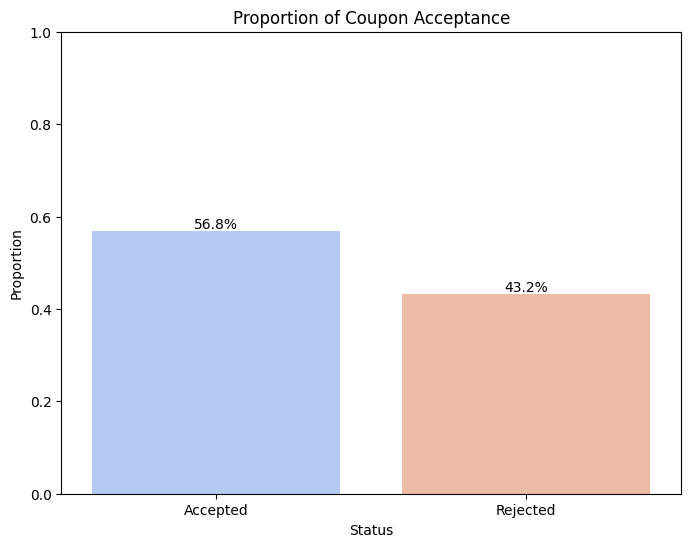

In [12]:
# Calculate the proportion of observations that chose to accept the coupon
acceptance_rate = data['y'].mean()

# Create a DataFrame for Seaborn barplot
acceptance_df = pd.DataFrame({
    'Status': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Proportion', data=acceptance_df, palette='coolwarm')

# Annotate each bar with the proportion value
for index, value in enumerate(acceptance_df['Proportion']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

# Customize the axes and title
plt.title('Proportion of Coupon Acceptance')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 6. Use a bar plot to visualize the `coupon` column.

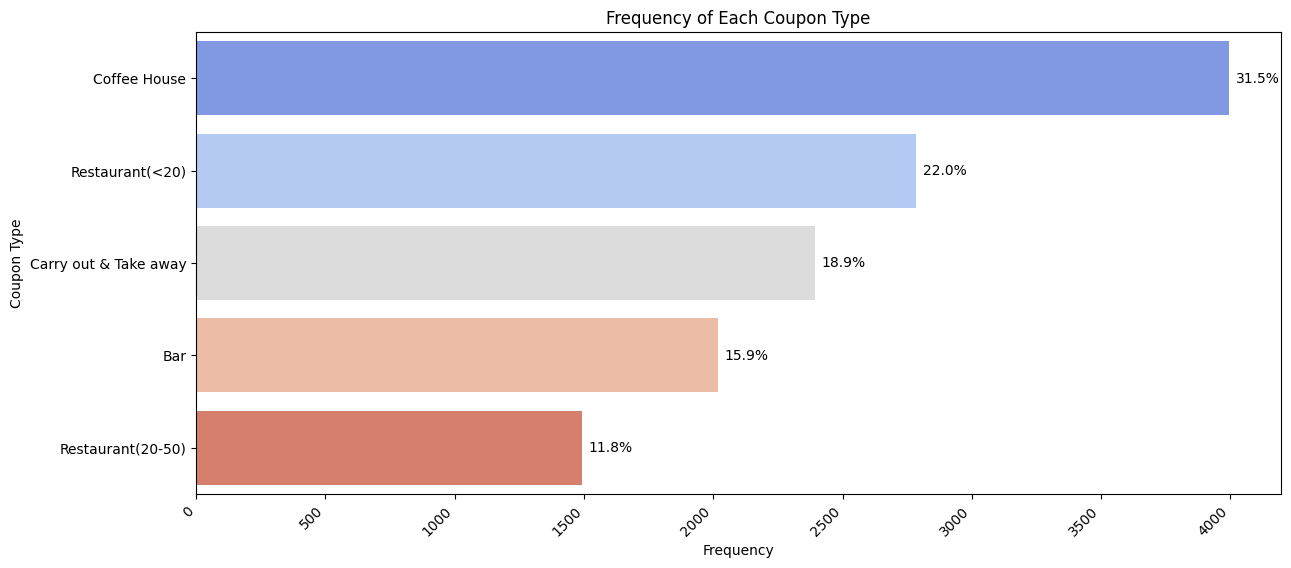

In [13]:
# Counting the occurrences of each coupon type
coupon_counts_df = data['coupon'].value_counts().reset_index()
coupon_counts_df.columns = ['coupon', 'frequency']

# Calculate the percentage of each coupon type
total_coupons = coupon_counts_df['frequency'].sum()
coupon_counts_df['percentage'] = (coupon_counts_df['frequency'] / total_coupons)

# Plotting with Seaborn barplot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='frequency', y='coupon', data=coupon_counts_df, palette='coolwarm')

# Annotating each bar with the percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width() / total_coupons * 100)
    ax.annotate(percentage, 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0),  # 5 points horizontal offset
                textcoords='offset points',
                va='center')

plt.xlabel('Frequency')
plt.ylabel('Coupon Type')
plt.title('Frequency of Each Coupon Type')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 7. Use a histogram to visualize the `temperature` column.

/Users/vijay/.pyenv/versions/3.11.8/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


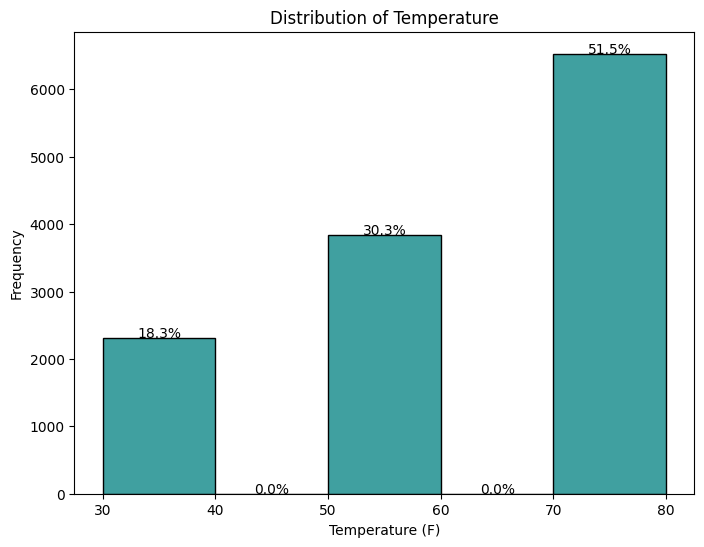

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a histogram and collect the output
hist_data = sns.histplot(data['temperature'], bins=5, kde=False, color='teal')

# Get the heights and the positions of the bars
for p in hist_data.patches:
    # Get the height of each bar
    height = p.get_height()
    # Get the percentage of each bin
    percentage = '{:.1%}'.format(height / len(data['temperature']))
    # Annotate each bar with the percentage
    plt.text(p.get_x() + p.get_width() / 2., height + 5, percentage, ha="center")

# Set the title and labels of the plot
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# **Investigating the `Bar Coupons`**

Now, we will lead you through an exploration of just the bar related coupons.  

## 1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# Filtering for just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons = bar_coupons.copy()


## 2. What proportion of bar coupons were accepted?


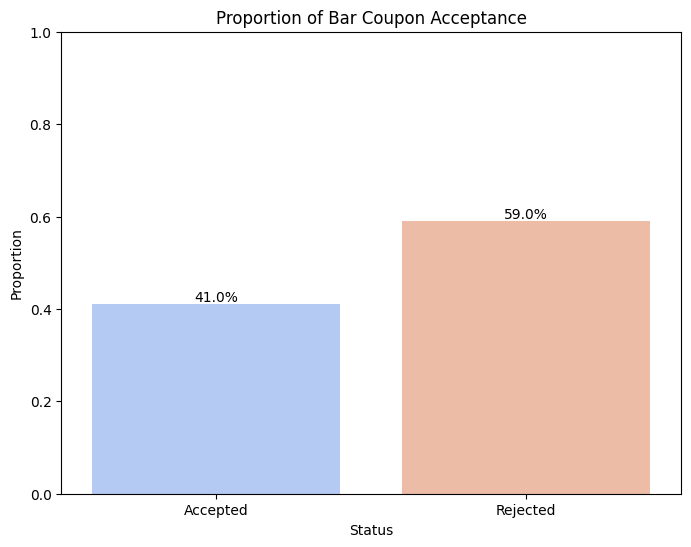

In [16]:
# Calculate the proportion of observations that chose to accept the coupon
acceptance_rate = bar_coupons['y'].mean()

# Create a DataFrame for Seaborn barplot
acceptance_df = pd.DataFrame({
    'Status': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Proportion', data=acceptance_df, palette='coolwarm')

# Annotate each bar with the proportion value
for index, value in enumerate(acceptance_df['Proportion']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

# Customize the axes and title
plt.title('Proportion of Bar Coupon Acceptance')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


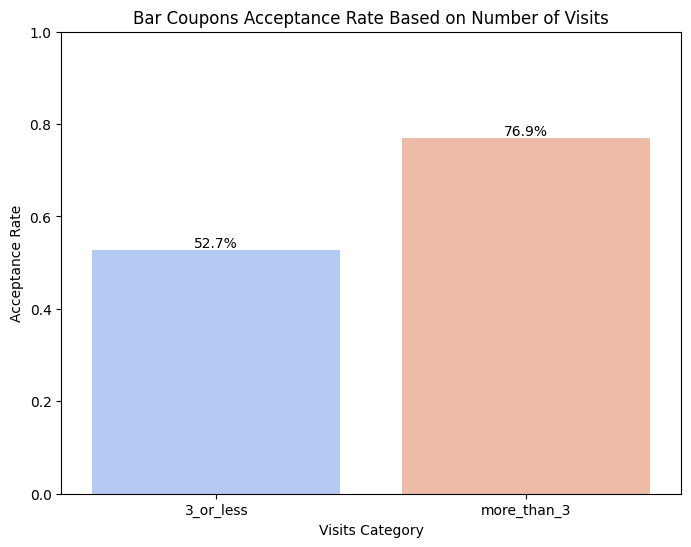

In [17]:
# Mapping visits to categories
bar_coupons['visits_category'] = bar_coupons['bar'].map({
    'less1': '3_or_less',
    '1~3': '3_or_less',
    '4~8': 'more_than_3',
    'gt8': 'more_than_3'
})

# Calculate acceptance rates
acceptance_rate_3_or_less = bar_coupons[bar_coupons['visits_category'] == '3_or_less']['y'].mean()
acceptance_rate_more_than_3 = bar_coupons[bar_coupons['visits_category'] == 'more_than_3']['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Visits Category': ['3_or_less', 'more_than_3'],
    'Acceptance Rate': [acceptance_rate_3_or_less, acceptance_rate_more_than_3]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Visits Category', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Bar Coupons Acceptance Rate Based on Number of Visits')
plt.xlabel('Visits Category')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


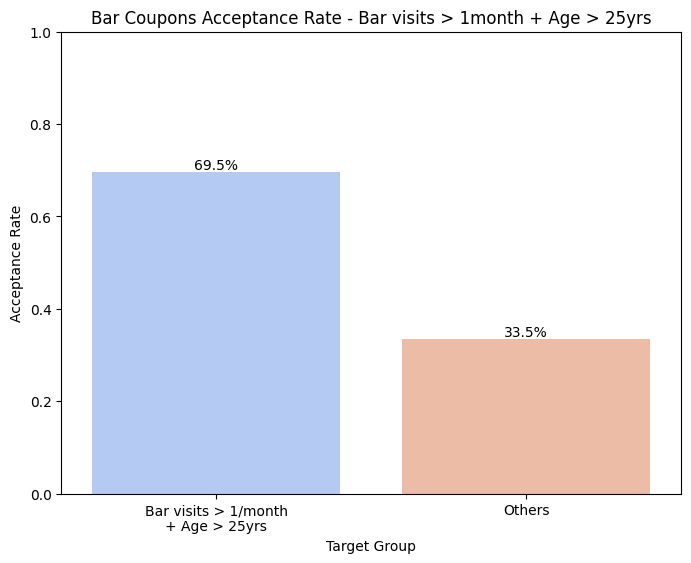

In [18]:
age_mapping = {
    '50plus': 50,  # Assume 50 for '50plus'
    'below21': 20,  # Assume 20 for 'below21'
}

bar_coupons['age'] = bar_coupons['age'].replace(age_mapping).astype(int)

# Define the conditions for the comparison
bar_visits_more_than_once_condition = bar_coupons['bar'].isin(['1~3', '4~8', 'gt8'])
age_gte_25_condition = bar_coupons['age'].astype(int) > 25

# Categorize drivers based on the condition
bar_coupons['target_group'] = bar_visits_more_than_once_condition & age_gte_25_condition

# Calculate acceptance rates
target_group_acceptance_rate = bar_coupons[bar_coupons['target_group']]['y'].mean()
others_acceptance_rate = bar_coupons[~bar_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Group': ['Bar visits > 1/month\n+ Age > 25yrs', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Bar Coupons Acceptance Rate - Bar visits > 1month + Age > 25yrs')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


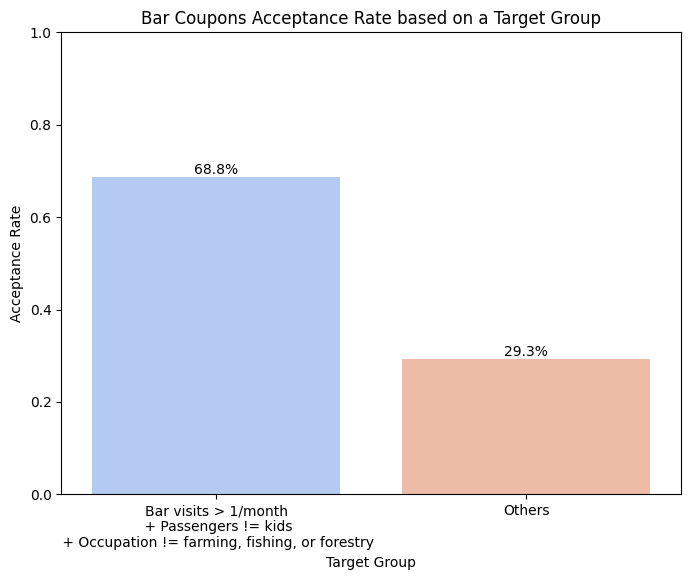

In [19]:
# Conditions for the target group
passenger_are_not_kids_condition = bar_coupons['passanger'] != 'Kids'
occupation_are_not_farming_fishing_forestry_condition = bar_coupons['occupation'] != 'farming, fishing, or forestry'

# Combine conditions
target_group_condition = bar_visits_more_than_once_condition & passenger_are_not_kids_condition & occupation_are_not_farming_fishing_forestry_condition

# Categorize drivers based on the combined condition
bar_coupons['target_group'] = target_group_condition

# Calculate acceptance rates
target_group_acceptance_rate = bar_coupons[bar_coupons['target_group']]['y'].mean()
others_acceptance_rate = bar_coupons[~bar_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Bar visits > 1/month\n + Passengers != kids\n + Occupation != farming, fishing, or forestry', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Bar Coupons Acceptance Rate based on a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

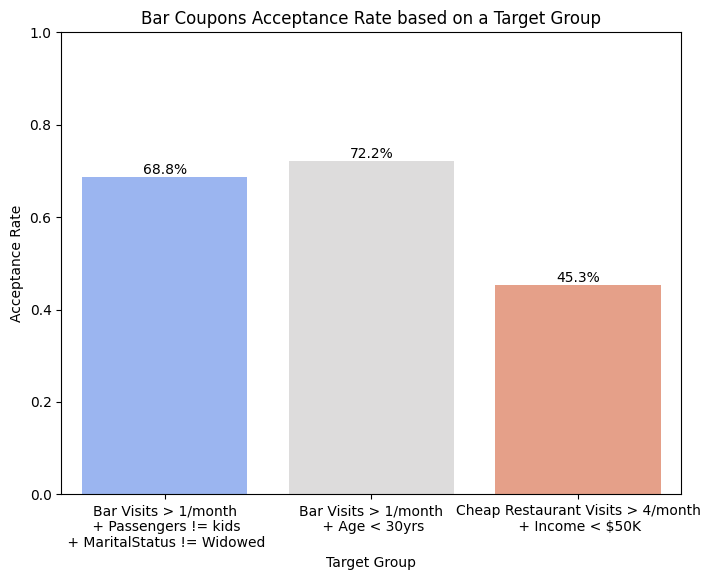

In [20]:
# Map income to a new binary condition: less than $50K or not
def map_income(income):
    if income in ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']:
        return 'Less than $50K'
    else:
        return 'More than $50K'

bar_coupons['income_category'] = bar_coupons['income'].apply(map_income)

# Define the conditions for each group
group_1_condition = bar_visits_more_than_once_condition & passenger_are_not_kids_condition & (bar_coupons['maritalstatus'] != 'Widowed')
group_2_condition = bar_visits_more_than_once_condition & (bar_coupons['age'].astype(int) < 30)
group_3_condition = (bar_coupons['restaurantlessthan20'].isin(['4~8', 'gt8'])) & (bar_coupons['income_category'] == 'Less than $50K')

# Calculate acceptance rates for each group
group_1_acceptance_rate = bar_coupons[group_1_condition]['y'].mean()
group_2_acceptance_rate = bar_coupons[group_2_condition]['y'].mean()
group_3_acceptance_rate = bar_coupons[group_3_condition]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Bar Visits > 1/month\n + Passengers != kids\n + MaritalStatus != Widowed', 'Bar Visits > 1/month\n + Age < 30yrs', 'Cheap Restaurant Visits > 4/month\n + Income < $50K'],
    'Acceptance Rate': [group_1_acceptance_rate, group_2_acceptance_rate, group_3_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Bar Coupons Acceptance Rate based on a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

We can hypothesize the following about drivers who accepted bar coupons:

+ Drivers who visit bars more than once a month and are over 25 years old, or those who visit bars more than once a month and are under 30 years old, are more likely to accept bar coupons. This could indicate that younger to mid-aged adults who enjoy nightlife and have a social lifestyle are more inclined to take advantage of such promotions.

+ Drivers with passengers other than kids and with occupations outside of farming, fishing, or forestry also have a higher acceptance rate, which suggests that the driver's social and professional context plays a significant role in their willingness to use bar coupons.

Overall, the hypothesis could be that drivers who are younger or middle-aged adults, not accompanied by children, engaged in social activities like visiting bars or restaurants, and especially those in a certain income bracket, are more receptive to bar coupon promotions. Marketers could use these insights to target their promotions more effectively.

## 8. Lastly, compare the acceptance rates between those drivers who go to bars with no urgent destination and passengers are friends and the weather is sunny and expiration is within 24hrs with others

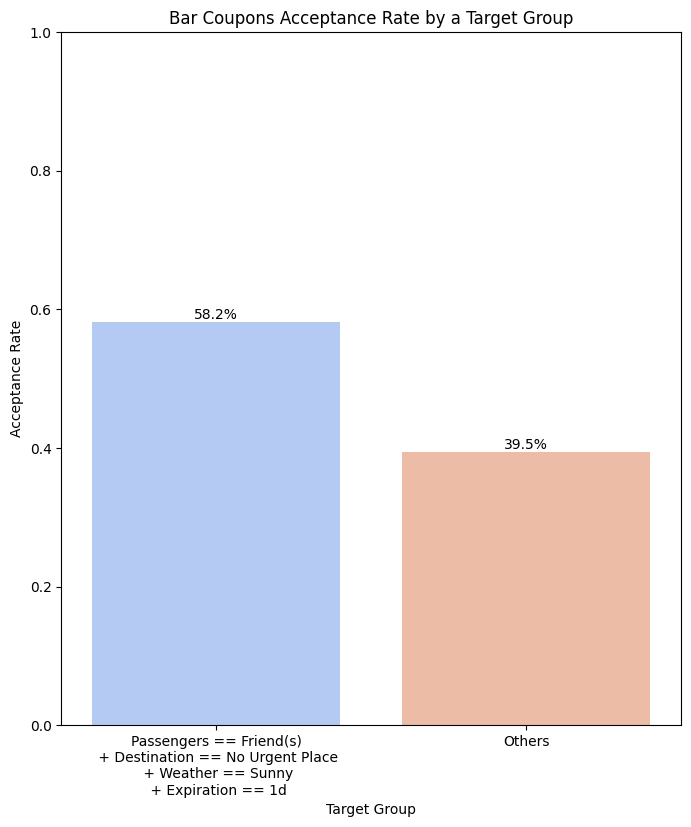

In [21]:
# Conditions for the target group
passenger_are_friends_condition = bar_coupons['passanger'] == 'Friend(s)'
no_urgent_place_destination_condition = bar_coupons['destination'] == 'No Urgent Place'
weather_is_sunny_condition = bar_coupons['weather'] == 'Sunny'
expiration_condition = bar_coupons['expiration'] == '1d'

# Combine conditions
target_group_condition = passenger_are_friends_condition & no_urgent_place_destination_condition & weather_is_sunny_condition & expiration_condition

# Categorize drivers based on the combined condition
bar_coupons['target_group'] = target_group_condition

# Calculate acceptance rates
target_group_acceptance_rate = bar_coupons[bar_coupons['target_group']]['y'].mean()
others_acceptance_rate = bar_coupons[~bar_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Passengers == Friend(s)\n + Destination == No Urgent Place\n + Weather == Sunny\n + Expiration == 1d', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 9))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Bar Coupons Acceptance Rate by a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

# **Independent Investigation**

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# **Investigating the `Cheap Restaurant Coupons`**

## 1. Create a new `DataFrame` that contains just the `Restaurant(<20)` coupons.


In [22]:
# Filtering for just the Cheap Restaurant coupons
cheap_restaurant_coupons = data[data['coupon'] == 'Restaurant(<20)']
cheap_restaurant_coupons = cheap_restaurant_coupons.copy()

## 2. What proportion of Cheap Restaurant coupons were accepted?

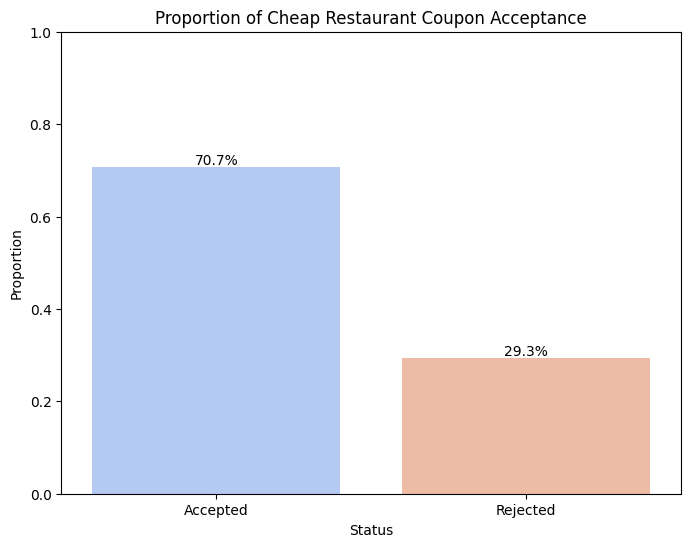

In [23]:
# Calculate the proportion of observations that chose to accept the coupon
acceptance_rate = cheap_restaurant_coupons['y'].mean()

# Create a DataFrame for Seaborn barplot
acceptance_rate_df = pd.DataFrame({
    'Status': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Proportion', data=acceptance_rate_df, palette='coolwarm')

# Customize the axes and title
plt.ylim(0, 1)
plt.title('Proportion of Cheap Restaurant Coupon Acceptance')

# Annotate each bar with the proportion value
for index, value in enumerate(acceptance_rate_df['Proportion']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

# Show the plot
plt.show()

## 3. Compare the acceptance rate of Cheap Restaurant Coupons based on `Destination`

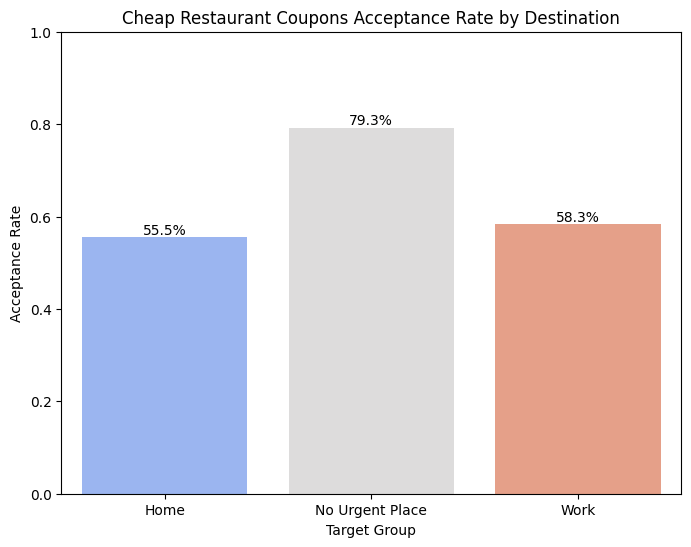

In [24]:
# Calculate the proportion of observations that chose to accept the coupon based on destination
acceptance_rate_by_destination = cheap_restaurant_coupons.groupby('destination')['y'].mean()

# Convert the resulting Series to a DataFrame for better visualization
acceptance_rate_by_destination_df = acceptance_rate_by_destination.reset_index()

# Rename columns for clarity
acceptance_rate_by_destination_df.columns = ['Destination', 'Acceptance Rate']

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Destination', y='Acceptance Rate', data=acceptance_rate_by_destination_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_by_destination_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Cheap Restaurant Coupons Acceptance Rate by Destination')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 4. Compare the acceptance rate of Cheap Restaurant Coupons based on `Passengers` in the car

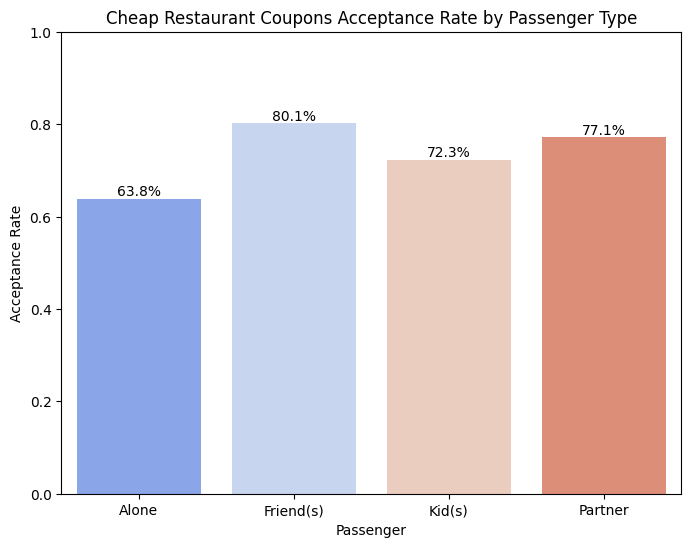

In [25]:
# Calculate the proportion of observations that chose to accept the coupon based on passengers in the car
acceptance_rate_by_passenger = cheap_restaurant_coupons.groupby('passanger')['y'].mean()

# Convert the resulting Series to a DataFrame for better visualization
acceptance_rate_by_passenger_df = acceptance_rate_by_passenger.reset_index()

# Rename columns for clarity
acceptance_rate_by_passenger_df.columns = ['Passanger', 'Acceptance Rate']

# Data for plotting
passengers = acceptance_rate_by_passenger_df['Passanger']
acceptance_rates = acceptance_rate_by_passenger_df['Acceptance Rate']

# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=passengers, y=acceptance_rates, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_by_passenger_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.xlabel('Passenger')
plt.ylabel('Acceptance Rate')
plt.title('Cheap Restaurant Coupons Acceptance Rate by Passenger Type')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 5. Compare the acceptance rate of Cheap Restaurant Coupons based on `Weather`

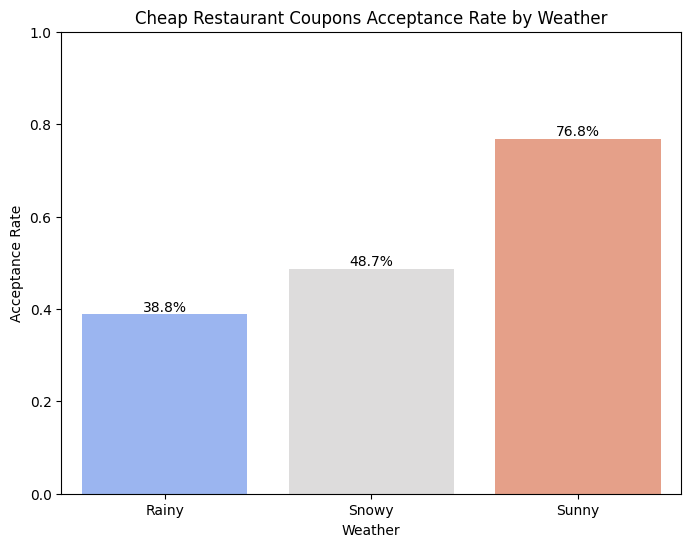

In [26]:
# Calculate the proportion of observations that chose to accept the coupon based on weather
acceptance_rate_by_weather = cheap_restaurant_coupons.groupby('weather')['y'].mean()

# Convert the resulting Series to a DataFrame for better visualization
acceptance_rate_by_weather_df = acceptance_rate_by_weather.reset_index()

# Rename columns for clarity
acceptance_rate_by_weather_df.columns = ['Weather', 'Acceptance Rate']

# Data for plotting
weather = acceptance_rate_by_weather_df['Weather']
acceptance_rates = acceptance_rate_by_weather_df['Acceptance Rate']

# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=weather, y=acceptance_rates, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_by_weather_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.title('Cheap Restaurant Coupons Acceptance Rate by Weather')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 6. Compare the acceptance rate of Cheap Restaurant Coupons based on `Expiration`

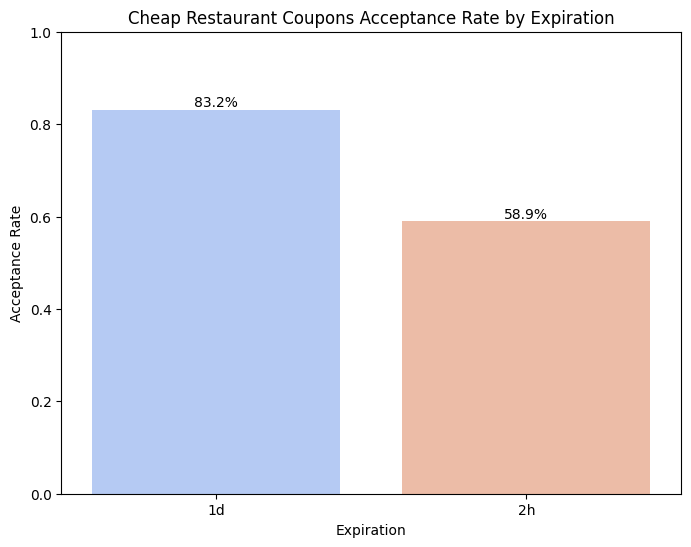

In [27]:
# Calculate the proportion of observations that chose to accept the coupon based on weather
acceptance_rate_by_expiration = cheap_restaurant_coupons.groupby('expiration')['y'].mean()

# Convert the resulting Series to a DataFrame for better visualization
acceptance_rate_by_expiration_df = acceptance_rate_by_expiration.reset_index()

# Rename columns for clarity
acceptance_rate_by_expiration_df.columns = ['Expiration', 'Acceptance Rate']

# Data for plotting
expiration = acceptance_rate_by_expiration_df['Expiration']
acceptance_rates = acceptance_rate_by_expiration_df['Acceptance Rate']

# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=expiration, y=acceptance_rates, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_by_expiration_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.xlabel('Expiration')
plt.ylabel('Acceptance Rate')
plt.title('Cheap Restaurant Coupons Acceptance Rate by Expiration')
plt.ylim(0, 1)

# Show the plot
plt.show()

## 7. Compare the acceptance rates between those drivers having no urgent destination and passengers are friends and the weather is sunny and coupon expiration is within 24hrs with others.

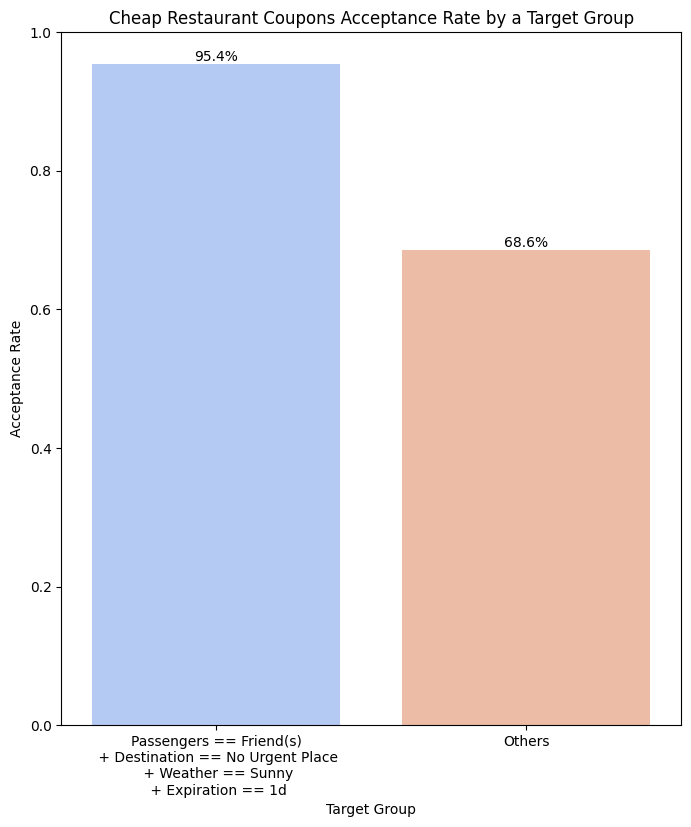

In [28]:
# Conditions for the target group
passenger_are_friends_condition = cheap_restaurant_coupons['passanger'] == 'Friend(s)'
no_urgent_place_destination_condition = cheap_restaurant_coupons['destination'] == 'No Urgent Place'
weather_is_sunny_condition = cheap_restaurant_coupons['weather'] == 'Sunny'
expiration_condition = cheap_restaurant_coupons['expiration'] == '1d'

# Combine conditions
target_group_condition = passenger_are_friends_condition & no_urgent_place_destination_condition & weather_is_sunny_condition & expiration_condition

# Categorize drivers based on the combined condition
cheap_restaurant_coupons['target_group'] = target_group_condition

# Calculate acceptance rates
target_group_acceptance_rate = cheap_restaurant_coupons[cheap_restaurant_coupons['target_group']]['y'].mean()
others_acceptance_rate = cheap_restaurant_coupons[~cheap_restaurant_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Passengers == Friend(s)\n + Destination == No Urgent Place\n + Weather == Sunny\n + Expiration == 1d', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 9))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Cheap Restaurant Coupons Acceptance Rate by a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

# **Investigating the `Carry out & Take away Coupons`**

## 1. Create a new `DataFrame` that contains just the `Carry out & Take away` coupons.


In [29]:
carry_out_and_take_away_coupons = data[data['coupon'] == 'Carry out & Take away']
carry_out_and_take_away_coupons = carry_out_and_take_away_coupons.copy()

## 2. What proportion of Carry out & Take away coupons were accepted?

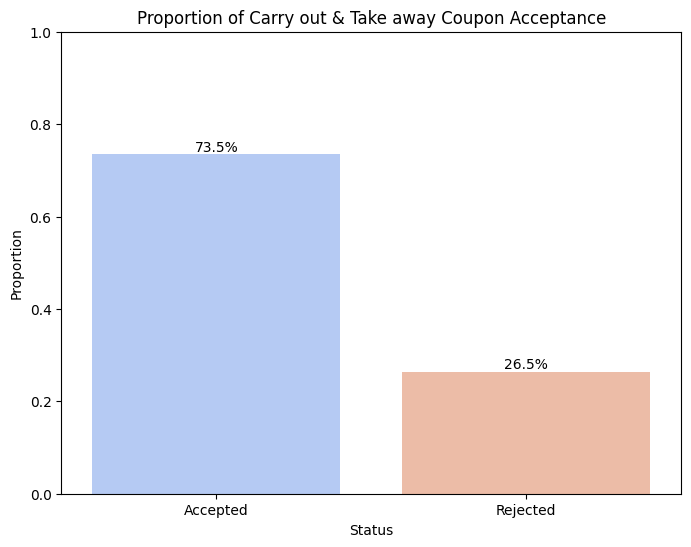

In [30]:
# Calculate the proportion of observations that chose to accept the coupon
acceptance_rate = carry_out_and_take_away_coupons['y'].mean()

# Create a DataFrame for Seaborn barplot
acceptance_rate_df = pd.DataFrame({
    'Status': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Proportion', data=acceptance_rate_df, palette='coolwarm')

# Customize the axes and title
plt.ylim(0, 1)
plt.title('Proportion of Carry out & Take away Coupon Acceptance')

# Annotate each bar with the proportion value
for index, value in enumerate(acceptance_rate_df['Proportion']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

# Show the plot
plt.show()

## 3. Compare the acceptance rates between those drivers having no urgent destination and passengers are friends and the weather is sunny and coupon expiration is within 24hrs with others.

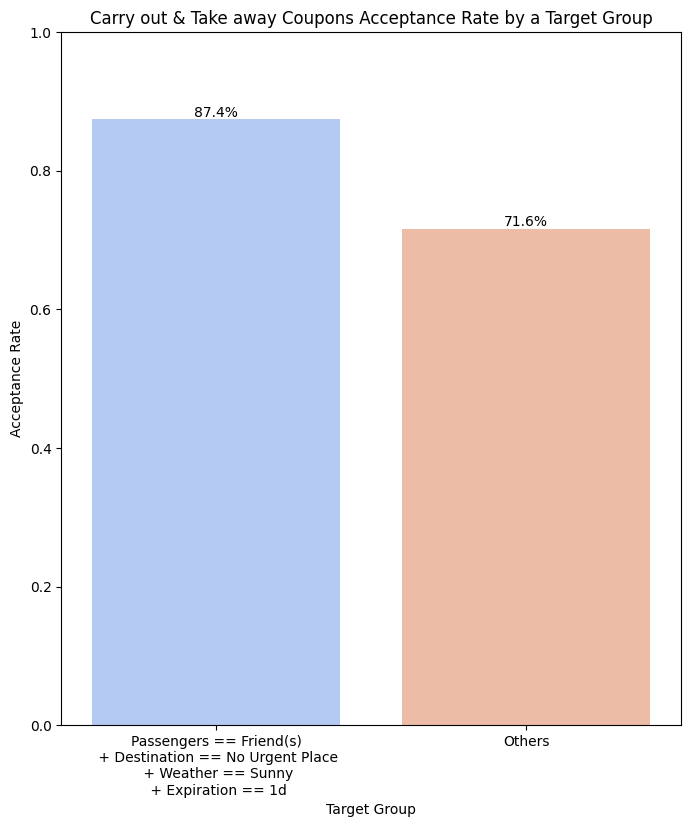

In [31]:
# Conditions for the target group
passenger_are_friends_condition = carry_out_and_take_away_coupons['passanger'] == 'Friend(s)'
no_urgent_place_destination_condition = carry_out_and_take_away_coupons['destination'] == 'No Urgent Place'
weather_is_sunny_condition = carry_out_and_take_away_coupons['weather'] == 'Sunny'
expiration_condition = carry_out_and_take_away_coupons['expiration'] == '1d'

# Combine conditions
target_group_condition = passenger_are_friends_condition & no_urgent_place_destination_condition & weather_is_sunny_condition & expiration_condition

# Categorize drivers based on the combined condition
carry_out_and_take_away_coupons['target_group'] = target_group_condition

# Calculate acceptance rates
target_group_acceptance_rate = carry_out_and_take_away_coupons[carry_out_and_take_away_coupons['target_group']]['y'].mean()
others_acceptance_rate = carry_out_and_take_away_coupons[~carry_out_and_take_away_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Passengers == Friend(s)\n + Destination == No Urgent Place\n + Weather == Sunny\n + Expiration == 1d', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 9))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Carry out & Take away Coupons Acceptance Rate by a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

# **Investigating the `Coffee House Coupons`**

## 1. Create a new `DataFrame` that contains just the `Coffee House` coupons.


In [32]:
coffee_house_coupons = data[data['coupon'] == 'Coffee House']
coffee_house_coupons = coffee_house_coupons.copy()

## 2. What proportion of Coffee House coupons were accepted?

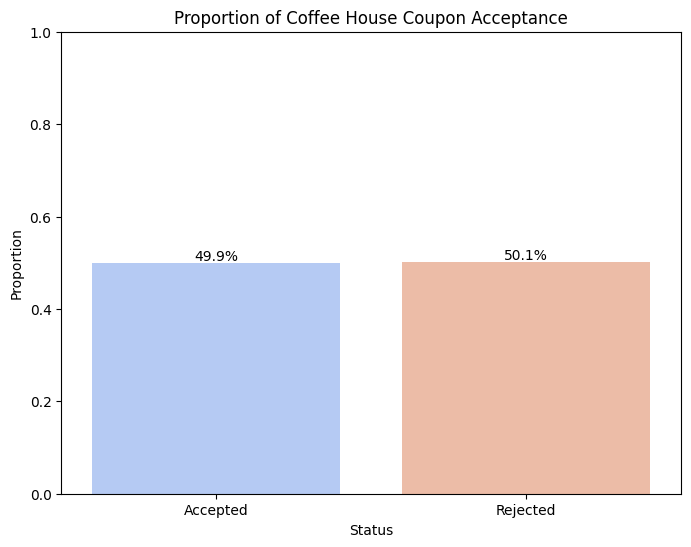

In [33]:
# Calculate the proportion of observations that chose to accept the coupon
acceptance_rate = coffee_house_coupons['y'].mean()

# Create a DataFrame for Seaborn barplot
acceptance_rate_df = pd.DataFrame({
    'Status': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Proportion', data=acceptance_rate_df, palette='coolwarm')

# Customize the axes and title
plt.ylim(0, 1)
plt.title('Proportion of Coffee House Coupon Acceptance')

# Annotate each bar with the proportion value
for index, value in enumerate(acceptance_rate_df['Proportion']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

# Show the plot
plt.show()

## 3. Compare the acceptance rates between those drivers having no urgent destination and passengers are friends and the weather is sunny and coupon expiration is within 24hrs with others.

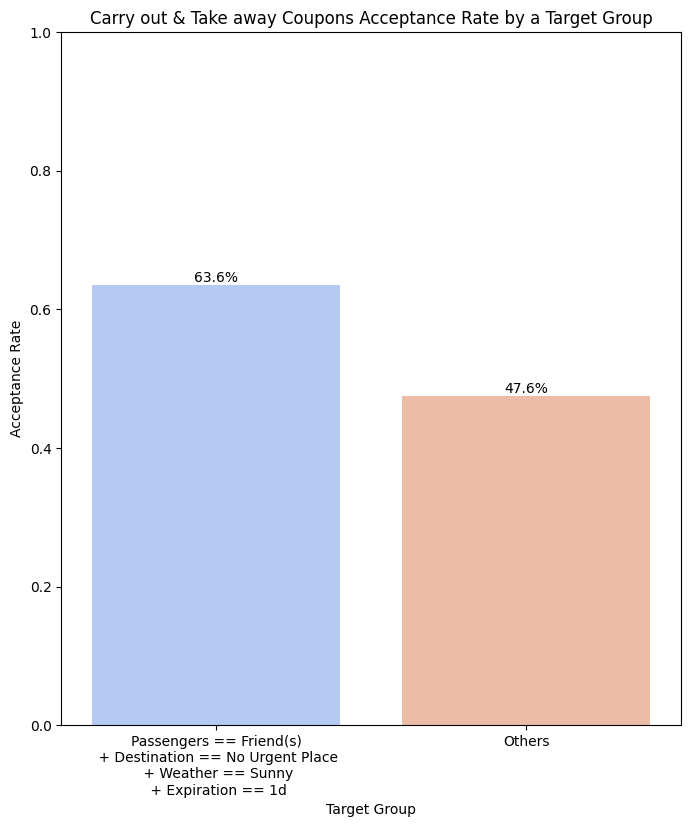

In [34]:
# Conditions for the target group
passenger_are_friends_condition = coffee_house_coupons['passanger'] == 'Friend(s)'
no_urgent_place_destination_condition = coffee_house_coupons['destination'] == 'No Urgent Place'
weather_is_sunny_condition = coffee_house_coupons['weather'] == 'Sunny'
expiration_condition = coffee_house_coupons['expiration'] == '1d'

# Combine conditions
target_group_condition = passenger_are_friends_condition & no_urgent_place_destination_condition & weather_is_sunny_condition & expiration_condition

# Categorize drivers based on the combined condition
coffee_house_coupons['target_group'] = target_group_condition

# Calculate acceptance rates
target_group_acceptance_rate = coffee_house_coupons[coffee_house_coupons['target_group']]['y'].mean()
others_acceptance_rate = coffee_house_coupons[~coffee_house_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Passengers == Friend(s)\n + Destination == No Urgent Place\n + Weather == Sunny\n + Expiration == 1d', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 9))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('Carry out & Take away Coupons Acceptance Rate by a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()

# **Investigating the `High-end Restaurant Coupons`**

## 1. Create a new `DataFrame` that contains just the `Restaurant(20-50)` coupons.


In [35]:
high_end_restaurant_coupons = data[data['coupon'] == 'Restaurant(20-50)']
high_end_restaurant_coupons = high_end_restaurant_coupons.copy()

## 2. What proportion of High-end Restaurant coupons were accepted?

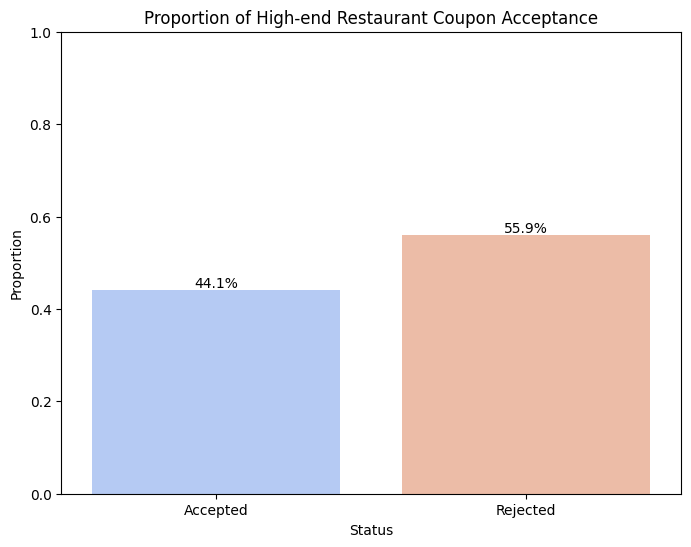

In [36]:
# Calculate the proportion of observations that chose to accept the coupon
acceptance_rate = high_end_restaurant_coupons['y'].mean()

# Create a DataFrame for Seaborn barplot
acceptance_rate_df = pd.DataFrame({
    'Status': ['Accepted', 'Rejected'],
    'Proportion': [acceptance_rate, 1 - acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Proportion', data=acceptance_rate_df, palette='coolwarm')

# Customize the axes and title
plt.ylim(0, 1)
plt.title('Proportion of High-end Restaurant Coupon Acceptance')

# Annotate each bar with the proportion value
for index, value in enumerate(acceptance_rate_df['Proportion']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

# Show the plot
plt.show()

## 3. Compare the acceptance rates between those drivers having no urgent destination and passengers are friends and the weather is sunny and coupon expiration is within 24hrs with others.

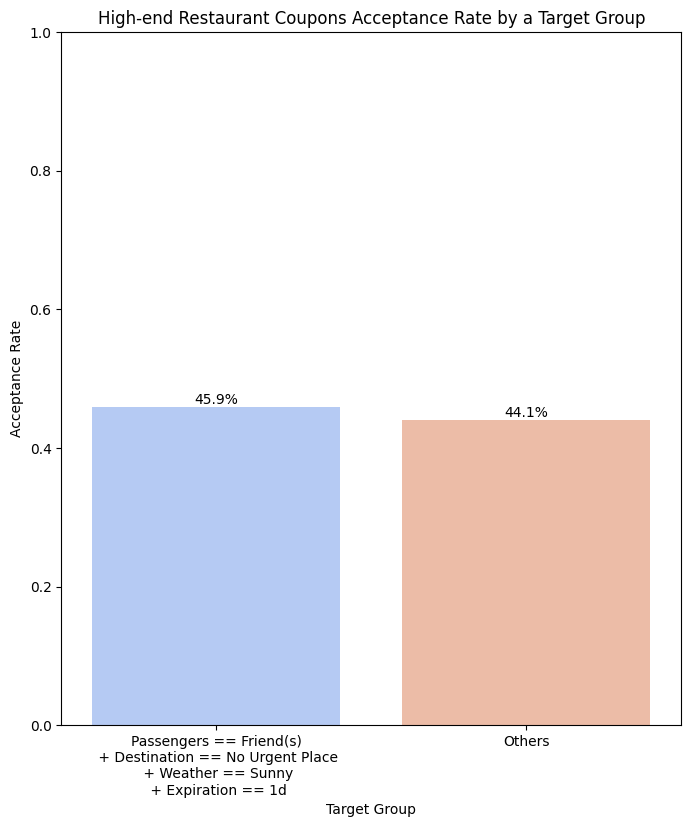

In [37]:
# Conditions for the target group
passenger_are_friends_condition = high_end_restaurant_coupons['passanger'] == 'Friend(s)'
no_urgent_place_destination_condition = high_end_restaurant_coupons['destination'] == 'No Urgent Place'
weather_is_sunny_condition = high_end_restaurant_coupons['weather'] == 'Sunny'
expiration_condition = high_end_restaurant_coupons['expiration'] == '1d'

# Combine conditions
target_group_condition = passenger_are_friends_condition & no_urgent_place_destination_condition & weather_is_sunny_condition & expiration_condition

# Categorize drivers based on the combined condition
high_end_restaurant_coupons['target_group'] = target_group_condition

# Calculate acceptance rates
target_group_acceptance_rate = high_end_restaurant_coupons[high_end_restaurant_coupons['target_group']]['y'].mean()
others_acceptance_rate = high_end_restaurant_coupons[~high_end_restaurant_coupons['target_group']]['y'].mean()

# Create a DataFrame for the acceptance rates
acceptance_rate_df = pd.DataFrame({
    'Target Group': ['Passengers == Friend(s)\n + Destination == No Urgent Place\n + Weather == Sunny\n + Expiration == 1d', 'Others'],
    'Acceptance Rate': [target_group_acceptance_rate, others_acceptance_rate]
})

# Plotting with Seaborn barplot
plt.figure(figsize=(8, 9))
sns.barplot(x='Target Group', y='Acceptance Rate', data=acceptance_rate_df, palette='coolwarm')

# Annotate each bar with the percentage value
for index, value in enumerate(acceptance_rate_df['Acceptance Rate']):
    plt.text(index, value, f'{value:.1%}', ha='center', va='bottom')

plt.title('High-end Restaurant Coupons Acceptance Rate by a Target Group')
plt.xlabel('Target Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

# Show the plot
plt.show()